In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.table
#import fitsio #(if we want to read faster)
import os
import flatmaps as fm
import pymaster as nmt
%matplotlib inline

Read the data file

In [2]:
HSCdatapath= '/global/cscratch1/sd/damonge/HSC/'
HSCFiles= ['HSC_WIDE_GAMA15H_forced.fits', 'HSC_WIDE_GAMA15H_random.fits']

In [3]:
data_tab = astropy.table.Table.read(os.path.join(HSCdatapath,HSCFiles[0]),hdu=1)

Select galaxies

In [4]:
data_gals = data_tab[(data_tab['iclassification_extendedness']==1) & (data_tab['icmodel_mag']<=25.8)]

/global/u2/j/jsanch87/.local/cori/2.7-anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


Read the mask and its info

In [5]:
mi, depth = fm.read_flat_map('maps/depthMap_i-band_JavisMethod.npz')

Create the data-map

In [81]:
mask = depth>=25.8

In [82]:
ipix = mi.pos2pix(data_gals['ra'],data_gals['dec'])
mp = np.bincount(ipix,minlength=mi.get_size())

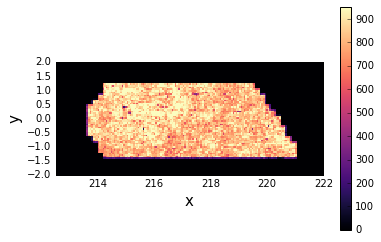

In [83]:
mi.view_map(mp)

In [84]:
dmap = np.zeros(len(mp))

In [85]:
dmap[mp!=0] = mp[mp!=0]/np.mean(mp[mp!=0])-1.

In [86]:
print np.where(dmap!=0)

(array([1699, 1700, 1701, ..., 9473, 9474, 9475]),)


Check how it looks like

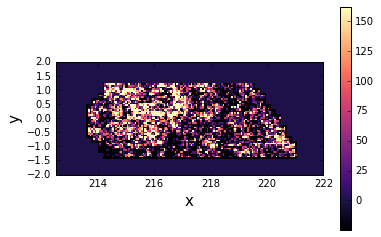

In [87]:
mi.view_map(dmap*mp)

Compute power spectrum

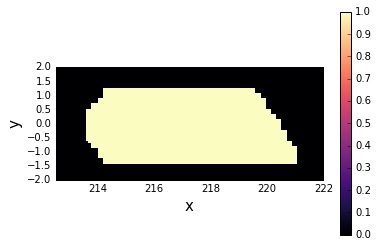

In [88]:
mi.view_map(mask)

In [89]:
#Compute power spectrum
cl,lbpw,wsp=mi.compute_power_spectrum(dmap*mask,mask)

[  180.   360.   540.   720.   900.  1080.  1260.  1440.  1620.  1800.
  1980.  2160.  2340.  2520.  2700.  2880.]


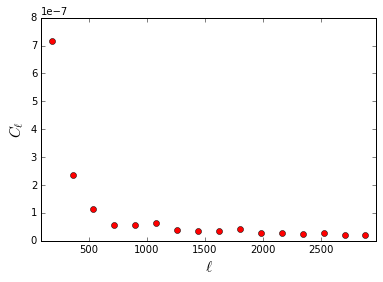

In [92]:
ells = np.mean(lbpw,axis=0)
plt.plot(ells,cl,'ro',label='Computed $C_\\ell$')
plt.xlim([lbpw[0,0],lbpw[1,-1]])
#plt.xscale('log')
plt.xlabel('$\\ell$',fontsize=15)
plt.ylabel('$C_\\ell$',fontsize=15)
print ells